<a href="https://colab.research.google.com/github/linyu3294/cs6220-data-minning-hw/blob/main/cs6220_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW1**

## **Problem 1 : Aminer : basic dataset analysis**
This is a large dataset (about 2 million publications – it takes about a minute just to parse!). While your notebook must successfully work on the entire dataset, you may find it useful to work on a subset while getting your code to work.

https://en.wikipedia.org/wiki/IPython#Notebook

https://aminer.org

https://en.wikipedia.org/wiki/ECML_PKDD

https://en.wikipedia.org/wiki/Quartile

---
### **Section A**


Compute the number of distinct authors, publication venues, publications, and citations/references 

---




```
Function def map_features() parses the raw data and stores the features in a dictionary that has the following features:

 {index : 
       [ publication, 
         [list of authors],
         publication venue, 
         [list of references] 
        ]
  }
```

In [1]:
def map_features(file):
    try:
        infile = open(file, 'r')
        all_data = infile.read()
        lines = all_data.splitlines()
        features = {}

        index = 0;
        for line in lines:

            if '#index' in line:
                index = int(line.split("#index ")[1].strip())
                features[index] = [None, [], None, []]

            '''publication'''
            if '#*' in line:
                features.get(index, [])[0] = line.split("#*")[1]

            '''author'''
            if '#@' in line:
                line = line.strip()
                if line:
                    # features.get(index, [])[1] = line.split("#@ ")[1].split(";")
                    features.get(index, [])[1] = line[3:].split(';')

            '''publication venue'''
            if '#c' in line:
                features.get(index, [])[2] = line.split("#c")[1]

            '''references'''
            if '#%' in line:
                reference_list = features.get(index, [])[3]
                reference_list.append(line.split("#%")[1])

        infile.close()

    except OSError:
        print('Oops there is an error when opening your file. ',
              'Make sure you the file exists in path!')
    return features


---
```
Initiating lists and sets to store features. These features will be parsed from the dictionary.
```

In [2]:
file = "/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/AP_train.txt"
features = map_features(file)
publications = []
authors = []
publication_venues = []
references = []


---
```
Parsing the features from the dictionary.
```

In [3]:
for i in features.values():
    publications.append(i[0])
    for author in i[1]:
        authors.append(author)
    publication_venues.append(i[2])
    if len(i[3]) != 0:
        for reference in i[3]:
            references.append(reference)

---
```
Deduping features by turning lists into sets.
```


In [4]:
unique_publications = set(publications)
unique_authors = set(authors)
unique_publication_venues = set(publication_venues)
unique_references = set(references)

---
```
Printing out the feature sets.
```

In [5]:
print('Total number of publications : ', len(publications))
print('Unique number of publications : ', len(unique_publications))
print('Unique number of authors : ', len(unique_authors))
print('Unique number of publication venues', len(unique_publication_venues))
print('Unique number of references', len(unique_references))

Total number of publications :  1976815
Unique number of publications :  1929487
Unique number of authors :  1484984
Unique number of publication venues 255688
Unique number of references 871092


---
### **Section B**

Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases”13 – what do you notice?




---
```
Using unique publication venues set, search for substring 'principles and practice of knowledge discovery'. 
Each time this substring appears, increase count.

To answer the question, these numbers are not likely to be accurate because the raw data is not clean. 
Searching the exact matches will result in some ommissions or duplications.
```


In [6]:
def count_in_public_venues(public_venues):
    count = 0;
    for public_venue in public_venues:
        if public_venue.lower().__contains__('principles and practice of knowledge discovery'):
            count = count + 1
    return count

---
```
print out the number of times substring 'principles and practice of knowledge discovery' appears.
```

In [7]:
principles_and_practice_count = count_in_public_venues(unique_publication_venues)
print('\"Principles and Practice of Knowledge Discovery in Databases\" appears : '
      , principles_and_practice_count, ' times')

"Principles and Practice of Knowledge Discovery in Databases" appears :  5  times


---
### **Section C**
For each author, construct the list of publications. 
Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

---
```
Being Lazy... reparsing the entire dataset. 
Looking for each time that an author tag appears in a publication.
Once a distinct author is found, add 1 to pub_per_author_dict to the key == author.
```



In [8]:
import matplotlib.pyplot as plt
import numpy as np


file = "/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/AP_train.txt"
pub_per_author_dict = {}

try:
  infile = open(file, 'r')
  all_data = infile.read()
  lines = all_data.splitlines()
  authors = []

  index = 0;
  for line in lines:
    '''parse authors'''
    if '#@' in line:
      line = line.strip()
      if line:
        authors = line[3:].split(';')
        for author in authors:
          temp = pub_per_author_dict.get(author, 0)
          pub_per_author_dict[author] = temp + 1
  infile.close()

except OSError:
  print('Oops there is an error when opening your file. ',
        'Make sure you the file exists in path!')

pub_per_author_dict.pop('')
pub_per_author_list = list(pub_per_author_dict.values())
pub_per_author_array = np.array(pub_per_author_list)

---
```
Plotting the Feequency of Publications Per Author 
```

Text(0, 0.5, 'Freequency of Publications')

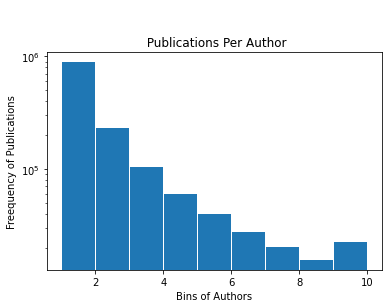

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(pub_per_author_array, [1,2,3,4,5,6,7,8,9,10], rwidth = 0.95)
plt.title ('\n\n Publications Per Author')
plt.xlabel('Bins of Authors')
plt.yscale('log')
plt.ylabel('Freequency of Publications')

---
### **Section D**

Calculate the mean and standard deviation of the number of publications per author. 
Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. 
Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.

This may need a little bit work.

----

```
Using the resulting pub_per_author_dict from part C.
Calculate and print the mean, median, 1st qrt, 3 qrt values, standard dev values.
```

In [10]:
import math
import statistics

mean = sum(pub_per_author_list)/len(unique_authors)
print ('The mean value of publications per author : ', mean)

mid_index = math.floor(len(unique_authors)/2)
median = pub_per_author_list[mid_index]
print ('The median value of publications per author : ', median)

first_quartile_index = (math.floor(mid_index/2))
sorted_pub_per_author_list = sorted(pub_per_author_list)
first_quartile_value = sorted_pub_per_author_list[mid_index]
print ('The first quartile value of publications per author : ', first_quartile_value)

third_quartile_index = (mid_index + first_quartile_index)
third_quartile_value = sorted_pub_per_author_list[third_quartile_index];
print ('The third quartile value of publications per author : ', third_quartile_value)

variance = 0;
for author_pub in pub_per_author_dict.values():
  variance = variance + (author_pub - mean) ** 2
standard_deviation = math.sqrt(variance / len(unique_authors))
print ('The standard deviation is : ',  standard_deviation)

The mean value of publications per author :  3.2779316140779966
The median value of publications per author :  1
The first quartile value of publications per author :  1
The third quartile value of publications per author :  2
The standard deviation is :  8.821600396560875


---
### **Section E**

Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?




---
```
Being Lazy... reparsing the entire dataset. 
Looking for each time that a venue tag appears in a publication.
Once a distinct venue is found, add 1 to pub_per_venue_dict to the key == venue.
```



In [11]:
import matplotlib.pyplot as plt

file = "/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/AP_train.txt"
pub_per_venue_dict = {}

try:
  infile = open(file, 'r')
  all_data = infile.read()
  lines = all_data.splitlines()

  index = 0;
  for line in lines:
    '''parse venue'''
    if '#c' in line:
      line = line.strip()
      if line:
        venue = line.split('#c') [1]
        temp = pub_per_venue_dict.get(venue, 0)
        pub_per_venue_dict[venue] = temp + 1
  infile.close()

except OSError:
  print('Oops there is an error when opening your file. ',
        'Make sure you the file exists in path!')

pub_per_venue_dict.pop('')
pub_per_venue_list = list(pub_per_author_dict.values())
pub_per_venue_array = np.array(pub_per_author_list)

---
```
plot a histogram of the number of publications per venue
```


Text(0, 0.5, 'Freequency of Publications')

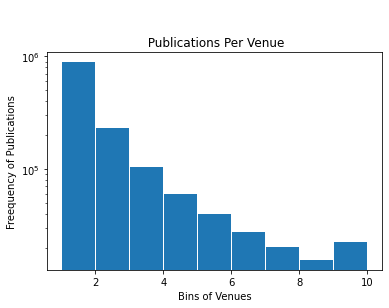

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(pub_per_venue_array, [1,2,3,4,5,6,7,8,9,10], rwidth = 0.95)
plt.title ('\n\n Publications Per Venue')
plt.xlabel('Bins of Venues')
plt.yscale('log')
plt.ylabel('Freequency of Publications')

---
```
Caluculate and print out the mean, first quartile, median, third quartile, standard deviation values for publication per venue.
```

In [13]:
import math
import statistics

mean = sum(pub_per_venue_list)/len(unique_publication_venues)
print ('The mean value of publications per venue : ', mean)

mid_index = math.floor(len(unique_publication_venues)/2)
median = pub_per_venue_list[mid_index]
print ('The median value of publications per venue : ', median)

sorted_pub_per_venue_list = sorted(pub_per_venue_list)
first_quartile_value = sorted_pub_per_venue_list[mid_index]
print ('The first quartile value of publications per venue: ', first_quartile_value)

third_quartile_index = (mid_index + first_quartile_index)
third_quartile_value = sorted_pub_per_venue_list[third_quartile_index];
print ('The third quartile value of publications per venue : ', third_quartile_value)

variance = 0;
for venue_pub in pub_per_venue_dict.values():
  variance = variance + (venue_pub - mean) ** 2
standard_deviation = math.sqrt(variance / len(unique_publication_venues))
print ('The standard deviation is : ',  standard_deviation)

The mean value of publications per venue :  19.037561402959856
The median value of publications per venue :  75
The first quartile value of publications per venue:  1
The third quartile value of publications per venue :  1
The standard deviation is :  84.14355512452438


---
### **Section F**
Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?

----



```
Using results from section A, create a seperate dictionary to keep track of references for each publication.
Plot a histogram of the number of references per publication.
```

Text(0, 0.5, 'Freequency of References')

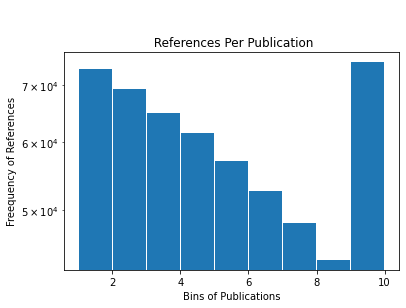

In [14]:
import matplotlib.pyplot as plt
import numpy as np

refs_per_pub_dict = {}

for pub_id in features.keys():
  refs_per_pub_dict [pub_id] = len(features.get(pub_id,[])[3])

refs_per_pub_list = list(refs_per_pub_dict.values())
refs_per_pub_array = np.array(refs_per_pub_list)

plt.hist(refs_per_pub_array, [1,2,3,4,5,6,7,8,9,10], rwidth = 0.95)
plt.title ('\n\n References Per Publication')
plt.xlabel('Bins of Publications')
plt.yscale('log')
plt.ylabel('Freequency of References')

---
```
Using results from section A, create a seperate dictionary to keep track of citations for each publication.
Plot a histogram of the number of citations per publication.
```

Text(0, 0.5, 'Freequency of References')

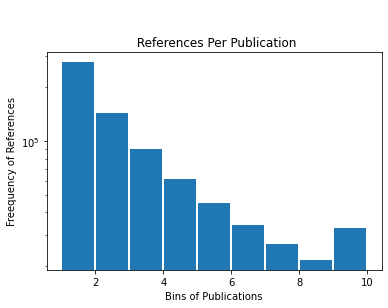

In [15]:
import matplotlib.pyplot as plt
import numpy as np

citations_per_pub_dict = {}

for vals in features.values():
  references = vals[3]
  for reference in references:
    temp = citations_per_pub_dict.get(reference, 0)
    citations_per_pub_dict [reference] = temp + 1

citations_per_pub_list = list(citations_per_pub_dict.values())
citations_per_pub_array = np.array(citations_per_pub_list)

plt.hist(citations_per_pub_array, [1,2,3,4,5,6,7,8,9,10], rwidth = 0.95)
plt.title ('\n\n References Per Publication')
plt.xlabel('Bins of Publications')
plt.yscale('log')
plt.ylabel('Freequency of References')

---
```
What is the publication with the largest number of references? 
What is the publication with the largest number of citations? 
Do these make sense?
```


In [16]:
sorted_refs_per_pub_list = sorted(refs_per_pub_list)[len(refs_per_pub_list)-1]
print ('Largest number of references : ', sorted_refs_per_pub_list)
sorted_citations_per_pub_dict = sorted(citations_per_pub_list)[len(citations_per_pub_list)-1]
print ('Largest number of citations : ', sorted_citations_per_pub_dict)



Largest number of references :  772
Largest number of citations :  7753


---
### **Section G**
Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results



---
```
Calculate the nominatior - number of citations for the publication in the venue.
Use the citations_per_pub_dict from section F's results.

Calculate the denominator - Publications per Venue.

For each venue, calculate the impact factor by division.
```

Text(0, 0.5, 'Impact Factor')

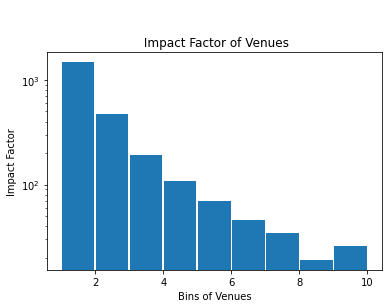

In [17]:
import matplotlib.pyplot as plt
import numpy as np

impact_factor_per_venue_dict ={}

cites_for_pubs_dict ={}
cites_for_pubs_per_venue_dict ={}
#


for key in features.keys():
  citations = len(features.get(key)[3])
  venue = features.get(key)[2]
  # cites_for_pubs_per_venue_dict.get(key,0) += citations
  temp = cites_for_pubs_per_venue_dict.get(key, 0) + citations
  cites_for_pubs_per_venue_dict [venue] = temp

for venue in pub_per_venue_dict.keys():
  if cites_for_pubs_per_venue_dict.get(venue) and pub_per_venue_dict.get(venue):
    impact_factor_per_venue_dict[venue] = cites_for_pubs_per_venue_dict.get(venue) / pub_per_venue_dict.get(venue)
  

impact_factor_per_venue_list = list(impact_factor_per_venue_dict.values())
impact_factor_per_venue_array = np.array(impact_factor_per_venue_list)

plt.hist(impact_factor_per_venue_array, [1,2,3,4,5,6,7,8,9,10], rwidth = 0.95)
plt.title ('\n\n Impact Factor of Venues')
plt.xlabel('Bins of Venues')
plt.yscale('log')
plt.ylabel('Impact Factor')

---
### **Section H**
What is the venue with the highest apparent impact factor?

Do you believe this number?(http://mdanderson.libanswers.com/faq/26159)


In [18]:
sorted_impact_factor_per_venue_list = sorted(impact_factor_per_venue_list)
highest_impact_venue = sorted_impact_factor_per_venue_list[len(sorted_impact_factor_per_venue_list)-1] 
print(highest_impact_venue)

555.0



---

### **Section I**

Now repeat the calculation from item b., but restrict the calculation to venues with at least 10 publications. 
How does your histogram change? 
List the citation counts for all publications from the venue with the highest impact factor. 
How does the impact factor (mean number of citations) compare to the median number of citations?


Text(0, 0.5, 'Impact Factor')

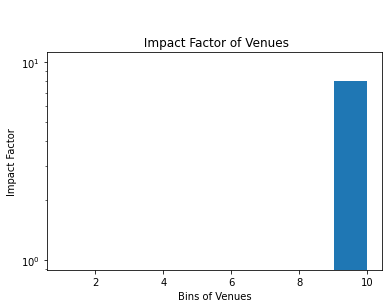

In [19]:
import matplotlib.pyplot as plt
import numpy as np

impact_factor_per_venue_dict ={}

cites_for_pubs_dict ={}
cites_for_pubs_per_venue_dict ={}
#


for key in features.keys():
  citations = len(features.get(key)[3])
  venue = features.get(key)[2]
  # cites_for_pubs_per_venue_dict.get(key,0) += citations
  temp = cites_for_pubs_per_venue_dict.get(key, 0) + citations
  cites_for_pubs_per_venue_dict [venue] = temp

for venue in pub_per_venue_dict.keys():
  if cites_for_pubs_per_venue_dict.get(venue) and pub_per_venue_dict.get(venue):
    impact_factor_per_venue_dict[venue] = cites_for_pubs_per_venue_dict.get(venue) / pub_per_venue_dict.get(venue)
  


impact_factor_per_venue_list = list(impact_factor_per_venue_dict.values())
impact_factor_per_venue_list = [i for i in impact_factor_per_venue_list if i >= 10]
impact_factor_per_venue_array = np.array(impact_factor_per_venue_list)

plt.hist(impact_factor_per_venue_array, [1,2,3,4,5,6,7,8,9,10], rwidth = 0.95)
plt.title ('\n\n Impact Factor of Venues')
plt.xlabel('Bins of Venues')
plt.yscale('log')
plt.ylabel('Impact Factor')

---
### **Section J**
J. Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.




Text(0, 0.5, 'Publications')

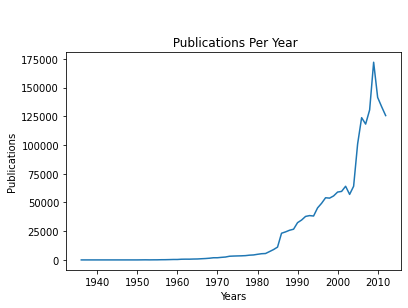

In [47]:
import matplotlib.pyplot as plt
import collections

file = "/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/AP_train.txt"
pub_per_year_dict = {}

try:
  infile = open(file, 'r')
  all_data = infile.read()
  lines = all_data.splitlines()

  index = 0;
  for line in lines:
    '''parse year'''
    if '#t' in line:
      line = line.strip()
      if line:
        year = line.replace('#t ','').strip()
        if year and len(year)==4:
          temp = pub_per_year_dict.get(int(year), 0)
          pub_per_year_dict[int(year)] = temp + 1
  infile.close()


except OSError:
  print('Oops there is an error when opening your file. ',
        'Make sure you the file exists in path!')


sorted_pub_per_year_dict ={}
for pub in sorted(pub_per_year_dict.keys()):
  sorted_pub_per_year_dict[pub] = pub_per_year_dict.get(pub)


plt.plot(list(sorted_pub_per_year_dict.keys()), list(sorted_pub_per_year_dict.values()))

plt.title ('\n\n Publications Per Year')
plt.xlabel('Years')
plt.ylabel('Publications')


---
## **Problem 2: Kosarak Association Rules**

Your task is to take a dataset of nearly one million clicks on a news site and use the Weka Explorer to identify interesting association rules. Ordinarily this would be a point-and-click task; however, the input data format is a list of transactions (each line in the file includes a list of anonymized news item id’s), whereas Weka requires a tabular format. Specifically, each distinct news item id should be represented via a column/attribute, and each row/instance should be a sequence of binary values, indicating whether or not the user visited the corresponding news item.

---

### **Section A**
Write a Python program which takes as its argument5 the path to a text file of data (assumed to be in the itemset format above) and produces as output to the console a sparse ARFF file.

---

```
Calculate the total number of news indices.
```

In [ ]:
infile = '/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/kosarak.dat'
max_news_index = 0;

try:
  infile = open(infile, "r")
  all_data = infile.read()
  lines = all_data.splitlines()

  for line in lines:
    if line:
      all_news_index_in_line = line.split(' ')
      for news_index in all_news_index_in_line:
        if int(news_index) > max_news_index:
          max_news_index = int(news_index)
  infile.close()
  print (max_news_index)
except OSError:
    print('Oops there is an error when opening your file. ',
          'Make sure you the file exists in path!')


---
```
Using the total number of news indices, create the @annotation entries in the .arff file. 
Then parse the .dat file to create @data entries in the .arff file.
Entries need to have ordered and unique idicies.
```

In [ ]:
infile = '/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/kosarak.dat'
outfile_path = '/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/kosarak.arff'

try:
  infile = open(infile, "r")
  all_data = infile.read()
  lines = all_data.splitlines()

  outfile = open(outfile_path, "w")  
  outfile.write('% Title : Kosarak News Clicks Database \n%\n')
  outfile.write('@relation kosarak\n')

  for i in range(max_news_index):
    string = '@attribute ' + 'news' + str(i) + ' {0, 1} \n' 
    outfile.write(string)

  outfile.write('@data\n')
  for line in lines:
    if line:
      user_entry = '{'
      all_news_index_in_line = line.split(' ')
      for i in range(0, len(all_news_index_in_line)): 
        all_news_index_in_line[i] = int(all_news_index_in_line[i]) 
      all_news_index_in_line = sorted (list(set(all_news_index_in_line)))
      for news_index in all_news_index_in_line:
          user_entry = user_entry + str(int(news_index)-1) + ' 1,'
      user_entry = user_entry[0:len(user_entry)-1] + '}'
      outfile.write(user_entry + '\n')

  infile.close()
  outfile.close()

except OSError:
    print('Oops there is an error when opening your file. ',
          'Make sure you the file exists in path!')
    


---

### **Section B**
Use your program to convert the kosarak.dat file to a sparse kosarak.arff. About how long did it take to run?

Answer : It takes about 30 secs to run.
---

---

### **Section C**
Load the resulting file into Weka (as described above; you should have 41,270 attributes and 990, 002 instances). About how long did it take to load this file?

Answer: It takes about 10 secs to load.
---

---

### **Section D**
Use Weka’s FP-Growth implementation to find rules that have support count of at least 49, 500 and confidence of at least 99% – record your rules (there should be 2).

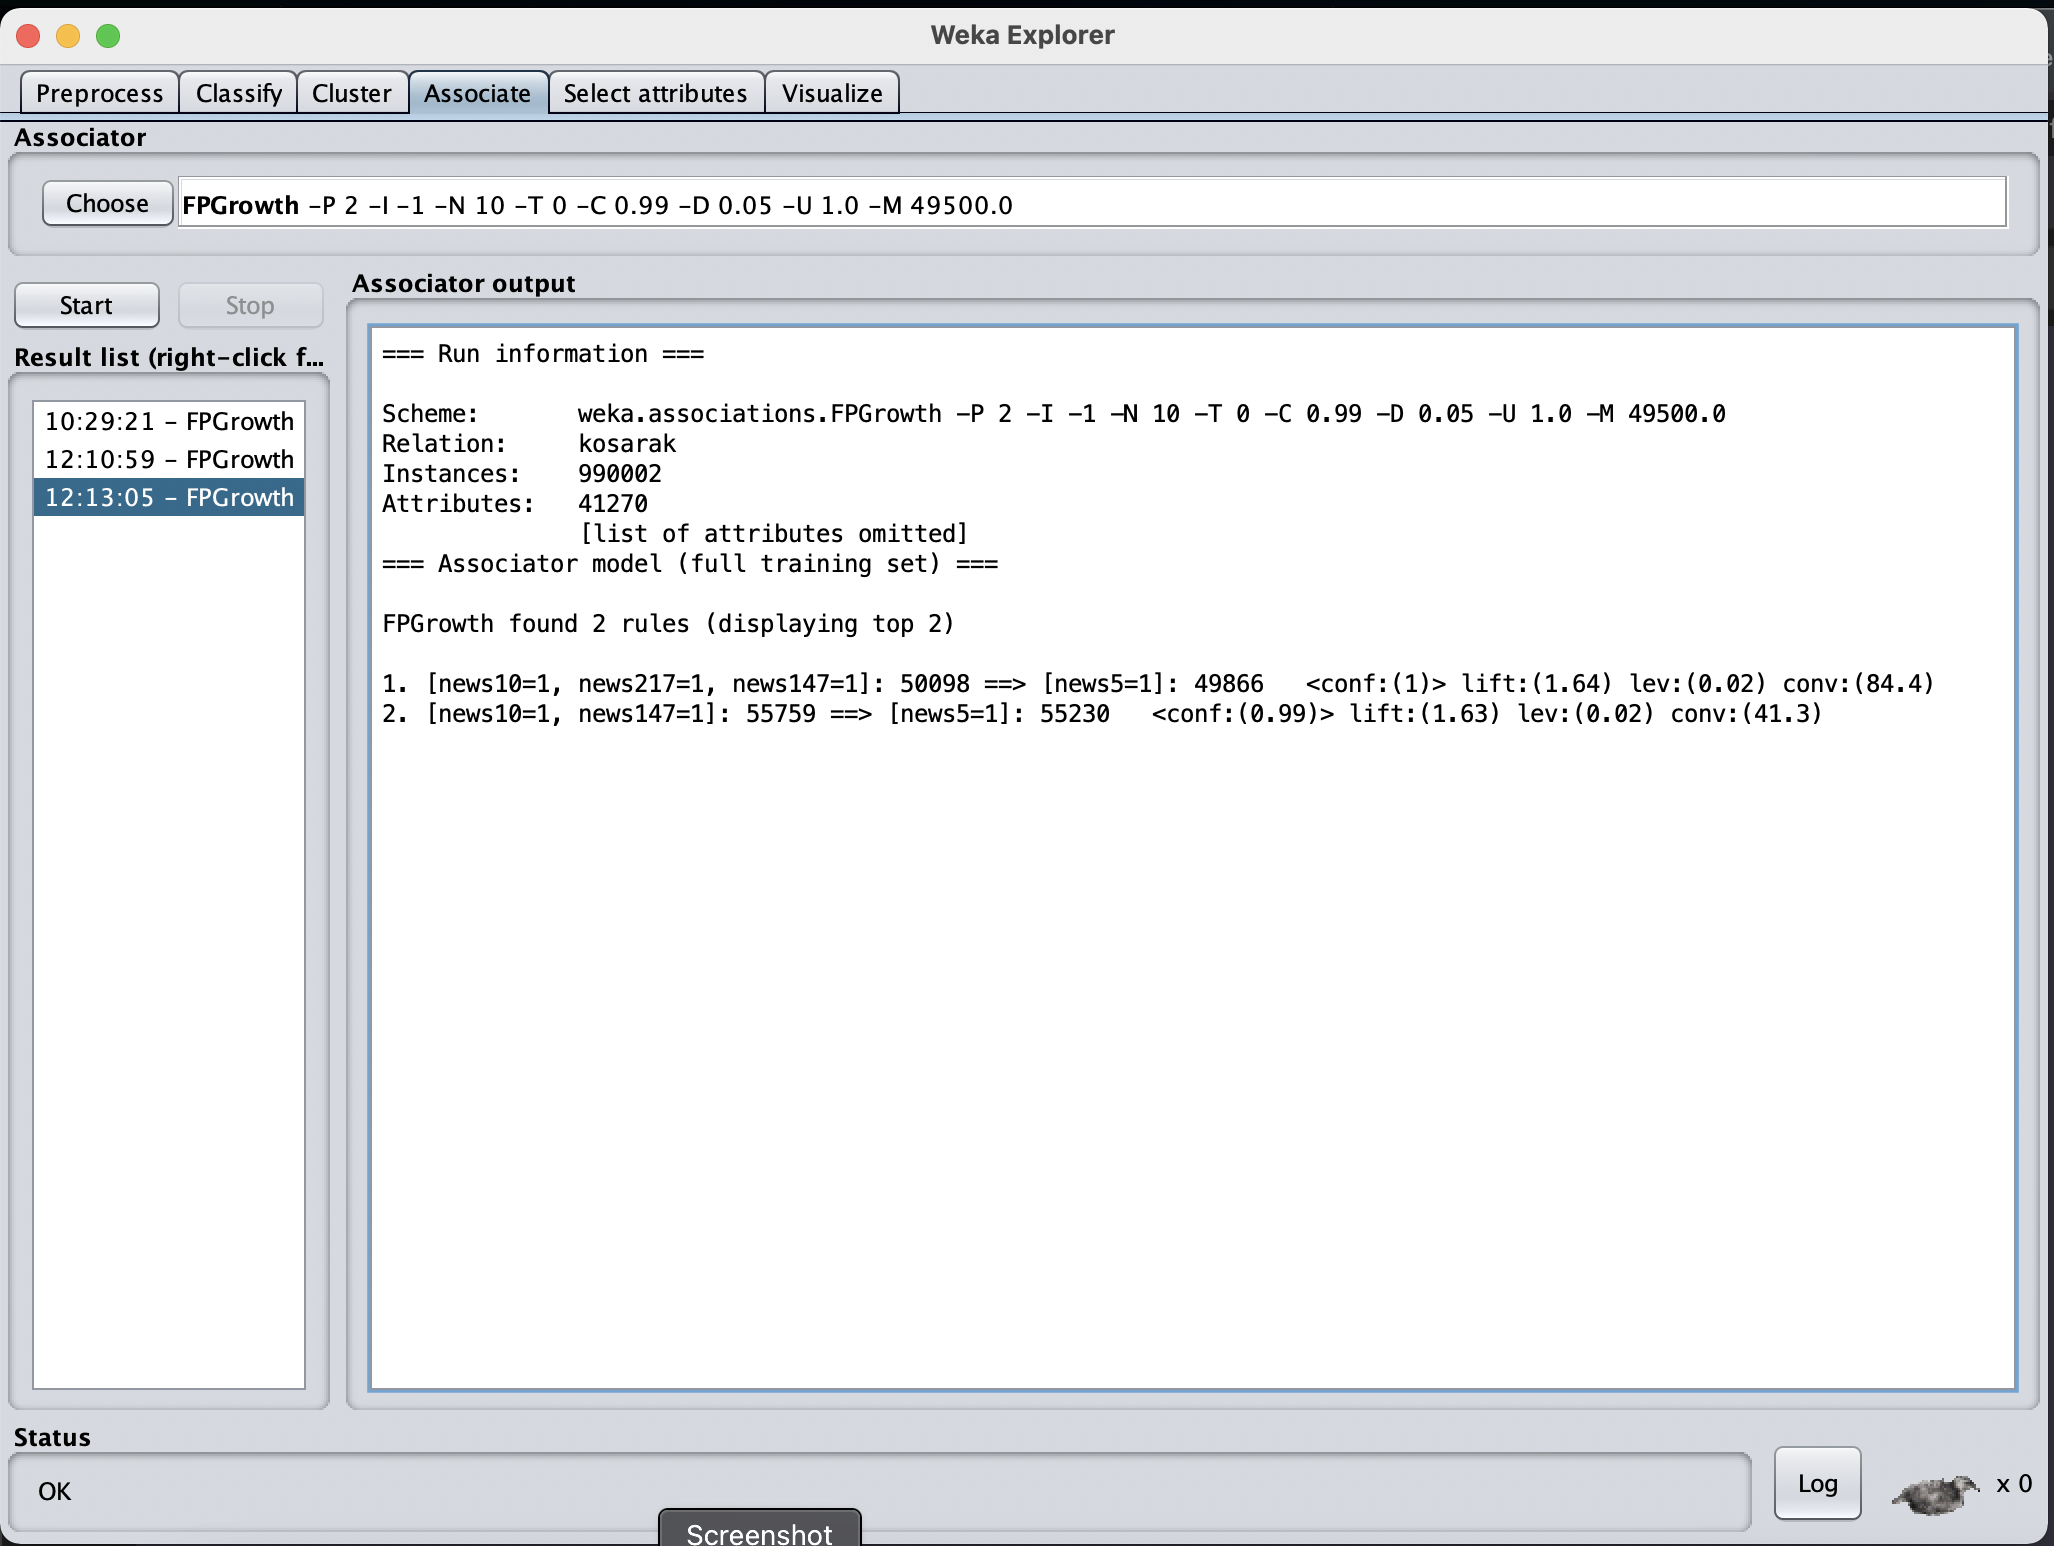
---

---

### **Section E**
Run the algorithm at least 5 times. Then look to the log and record how much time each took. How does the average time compare to the time necessary to convert the dataset and then load into Weka?

It takes 5 seconds to run on average. The average time is significantly less than the loading time.

---

## **Problem  3: MNIST, 20 NG . Parse, normalize features, Compute pairwaise similarity matrices**

The parsers are very different for the two datasets (text vs images) but you are allwed to use a library/package to do so. These being very very popular research datasets, it should be easy to find appropriate parsers. You can try to normalize each column/feature separately with wither one of the following ideas. Do not normalize labels. When normalizing a column, make sure to normalize its values across all datapoints (train,test,validation, etc) for consistency

Typical options for feature values (nomalization optional):
20NG text row normalization TF(term,doc) / DL (doc). 

For text is critical to maintain a sparse format due to large number of columns; make sure any cvalue transformation retains the 0 values.

MNIST : since these images are black and white (and some gray) the pixel values are already in a preformatted range [0-255]. 

They may not require normalization, but perhaps its easier to get the values to have 0 mean instead of 128 mean. 

Depending on what similarity/distance measure you use, computation of similarity might be easy but the size of the similarity matrix might present a challenge.


Shift-and-scale normalization: substract the minimum, then divide by new maximum. Now all values are between 0-1
Zero mean, unit variance : substract the mean, divide by the appropriate value to get variance=1
Options for distance/similarity. 

You are encouraged to use a package library available in Matlab/Java/Python/R to compute the pairwise similarity/distance matrix


cosine or simple dot product (required)

euclidian distance (required)

editing distance (optional)

jaccard similarity(optional)

Manhattan distance(optional)


https://en.wikipedia.org/wiki/Feature_scaling

https://en.wikipedia.org/wiki/Distance_matrix

https://en.wikipedia.org/wiki/Distance

https://en.wikipedia.org/wiki/Category:Similarity_and_distance_measures
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.154.8446&rep=rep1&type=pdf
http://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/




---

### **Section A : MNIST**

---

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# let's print the shape before we reshape and normalize
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)



In [ ]:
import numpy as np 
from sklearn.preprocessing import normalize
from numpy import dot
from numpy.linalg import norm
from sklearn import metrics
from scipy.sparse import csr_matrix

# reshaping the 3d matrix into 
x_train = np.reshape(x_train, (60000, 784)) 
x_train_normalized = csr_matrix(normalize(x_train, norm ='max'))
a = metrics.pairwise.cosine_similarity (x_train_normalized[0:1000])
print('\nCosine Similarity: \n\n\n', a , '\n\n')
b = metrics.pairwise.euclidean_distances(x_train_normalized[0:1000])
print('\nEuclidean Distance : \n\n\n', b)
c = metrics.pairwise.manhattan_distances(x_train_normalized[0:1000])
print('\nManhattan Distance : \n\n\n', c)


---

### **Section B : 20 NG**

---